In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/My Drive/'
train = pd.read_csv(path + 'Train.csv')
test  = pd.read_csv(path + 'Test.csv')

In [ ]:
# import scikit tools to read kowope dataset
test = pd.read_csv('/content/drive/My Drive/Test.csv')
train = pd.read_csv('/content/drive/My Drive/Train.csv')


In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 130kB/s 


In [ ]:
pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
  
# visualization Library/tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modelling/preprocessing tools
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# machine learning algorithm

# sklearn series
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Other Non-sklearn machine learning algorithm series
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from scipy.stats import randint as sp_randint
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')

#### Data Sample Preview

In [ ]:
train.sample(5)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
24603,Apcnt_1141084,3406.0,0.94940,0.9212,0.0000,0.0,84413.0,763607.0,289027.0,6804777.0,1681647.0,NaN,997785.0,1824799.0,28141427,100689927.0,0.0,0.0,0.0,1.0,1.0,97.500,7793.625,4473.915,51.420,3316.5,16335.0,10890.0,122.0,17154.0,6630.0,NaN,1454.0,20.1666,0.0,0.0,14.0,14.0,6.0,0.0,NaN,NaN,0.458337,5.05,0.271408,1.0,0.0,charge,128.009365,0.520508,0.241806,yes
6389,Apcnt_1036524,3670.0,0.08975,0.0520,0.0000,0.0,192944.0,4934465.0,4934465.0,63665296.0,23896659.0,NaN,2394295.0,21945046.0,3854990,NaN,0.0,0.0,0.0,0.0,0.0,26.370,559.425,260.325,10.365,2659.5,20895.0,5476.0,670.0,22449.0,NaN,NaN,2098.0,33.8334,0.0,0.0,18.0,22.0,12.0,0.0,NaN,NaN,0.000000,18.18,0.288264,NaN,NaN,lending,4272.284427,0.000000,16.515031,no
3332,Apcnt_1018996,3236.0,0.44480,2.3952,3.5514,0.0,0.0,2623805.0,385499.0,5421882.0,4185251.0,NaN,3246594.0,5307905.0,21973443,73244810.0,1.0,1.0,1.0,4.0,4.0,159.000,14950.005,NaN,134.250,1759.5,3834.0,2556.0,0.0,9672.0,2556.0,NaN,540.0,6.1666,3.0,1.0,18.0,4.0,12.0,0.0,NaN,132.8235,0.115786,5.05,0.721464,1.0,0.0,charge,217.148948,1.178134,0.246747,yes
39495,Apcnt_1226092,NaN,NaN,0.0000,0.0000,0.0,NaN,NaN,NaN,3276936.0,0.0,NaN,NaN,NaN,16576457,28116142.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,8076.0,NaN,NaN,60772.0,25368.0,NaN,NaN,354.0,46.3334,0.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN,yes
3004,Apcnt_1017060,3494.0,1.05595,0.0000,0.0000,0.0,0.0,6836286.0,928932.0,7126480.0,10441927.0,1005565.0,3917619.0,1053412.0,134924650,53969860.0,0.0,0.0,0.0,2.0,2.0,117.195,13384.620,13384.620,142.185,5878.5,14052.0,9368.0,60772.0,17703.0,5292.0,NaN,1546.0,15.0000,0.0,0.0,14.0,10.0,2.0,0.0,NaN,30.9240,0.338459,5.05,0.739760,0.0,0.0,charge,292.673705,2.000000,0.052818,no


In [ ]:
test.sample(5)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
16759,Apcnt_1222636,3276.0,0.61185,1.3972,0.0,12.5748,NaN,275412.0,NaN,1291480.0,1046410.0,408450.0,0.0,0.0,3576077,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2668.5,5019.0,3346.0,0.0,15603.0,NaN,9216.0,234.0,3.1666,0.0,NaN,8.0,2.0,6.0,0.0,142.491,NaN,0.825,1.01,0.800000,NaN,NaN,charge,NaN,5.245620,0.361144
970,Apcnt_1013268,3520.0,0.68005,0.0000,0.0,0.0000,116311.0,3559739.0,116311.0,2046918.0,3676050.0,14393.0,808731.0,417786.0,28141427,NaN,0.0,0.0,0.0,1.0,1.0,131.130,NaN,NaN,131.13,3102.0,7755.0,5170.0,1642.0,13689.0,NaN,NaN,272.0,25.1666,0.0,NaN,6.0,4.0,2.0,0.0,NaN,NaN,0.110,4.04,0.774520,0.0,NaN,charge,NaN,1.000000,0.072737
4241,Apcnt_1056220,3514.0,0.42170,1.0622,0.0,0.0000,385499.0,535264.0,535264.0,1156497.0,920763.0,NaN,197223.0,792393.0,9637475,NaN,0.0,0.0,0.0,0.0,0.0,40.425,NaN,NaN,25.65,2737.5,7665.0,5110.0,122.0,7665.0,NaN,NaN,360.0,14.0000,0.0,NaN,2.0,4.0,0.0,0.0,NaN,NaN,0.825,3.03,0.800000,NaN,NaN,lending,NaN,0.000000,0.120000
18407,Apcnt_924340,3088.0,NaN,1.0850,0.0,0.0000,0.0,53682.0,53682.0,1227295.0,104252.0,477692.0,1007510.0,1573894.0,21973443,NaN,1.0,1.0,1.0,4.0,4.0,150.810,NaN,NaN,150.81,1855.5,8214.0,5476.0,60.0,8214.0,NaN,NaN,488.0,15.6666,0.0,NaN,14.0,2.0,4.0,0.0,NaN,NaN,1.100,1.01,0.521160,NaN,NaN,charge,NaN,1.918465,NaN
9055,Apcnt_1120284,3818.0,0.06820,0.0000,0.0,0.0000,827403.0,5204431.0,5204431.0,126266288.0,42392442.0,NaN,667913.0,5990989.0,21973443,NaN,0.0,0.0,0.0,0.0,0.0,11.295,0.0,0.0,1.89,2047.5,12135.0,8090.0,60772.0,24639.0,7666.0,NaN,4128.0,51.1666,0.0,0.0,8.0,54.0,12.0,0.0,NaN,NaN,0.000,21.21,0.525328,NaN,0.0,lending,667913.0,0.000000,5.746313


In [ ]:
# create dictionary of ordinal to integer mapping
ord= {'yes':1, 'no':0 }

# apply using map

train['default_status'] = train.default_status.map(ord)
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


In [ ]:
# Converting form_field47 into categorical Variable
ord1= {'charge': 1, 'lending': 0}

train['form_field47'] =train['form_field47'].map(ord1)
test['form_field47'] = test['form_field47'].map(ord1)


In [ ]:
train['form_field47'].head()

0    1
1    1
2    1
3    1
4    1
Name: form_field47, dtype: int64

### DATA VISUALIZATION

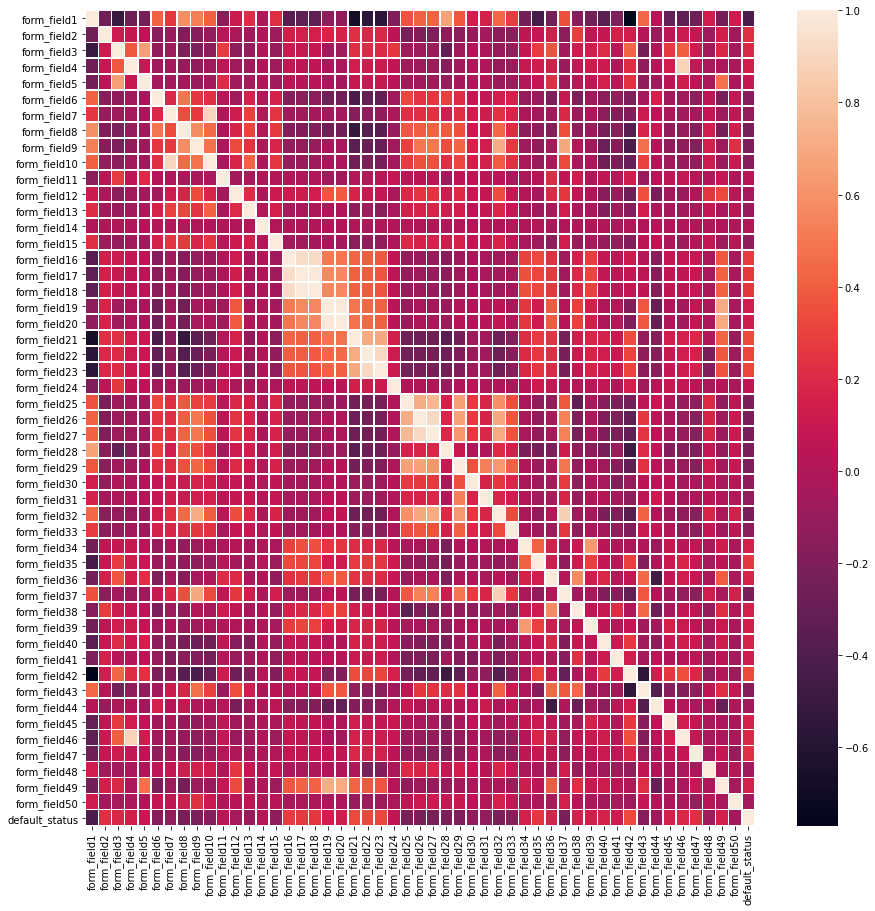

In [ ]:
#correlation map
import seaborn as sns
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), 
          # annot=True, 
            linewidths=.5,
            fmt= '.2f',ax=ax)
plt.show()

#### Encoding Categorical Variable

In [ ]:
#Encode all categorical variables

#train =pd.get_dummies(train, columns= obj_dtype)
#test = pd.get_dummies(test, columns= obj_dtype)
#train.columns

# I stopped encoding categorical variables because they were reducing my scores on the leaderboard.....

#### Checking for lopsided data
#### Skewed data

In [ ]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,56000.000000,3.511100e+04,55645.000000,4.494400e+04,56000.000000
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,0.649518,3.052449e+05,1.049061,6.005862e+05,0.244911
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,0.477125,1.647757e+06,1.806160,5.842405e+06,0.430038
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02,0.000000
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,1.000000

In [ ]:
# identifying outlier by skew method
#skew_df= pd.DataFrame({'train set':train.skew(), 'test set':test.skew()})
#skew_df

In [ ]:
#df_train['form_field10']= np.log1p(df_train['form_field10'])
#df_test['form_field10']= np.log1p(df_test['form_field10'])

#df_train['form_field14']= np.log1p(df_train['form_field14'])
#df_test['form_field14']= np.log1p(df_test['form_field14'])

#df_train['form_field4']= np.log1p(df_train['form_field4'])   #This performed better
#df_test['form_field4']= np.log1p(df_test['form_field4'])     #This performed better

#df_train['form_field5']= np.log1p(df_train['form_field5'])   #This performed better
#df_test['form_field5']= np.log1p(df_test['form_field5'])     #This performed better

#df_train['form_field7']= np.log1p(df_train['form_field7'])   #This performed better
#df_test['form_field7']= np.log1p(df_test['form_field7'])     #This performed better

#df_train['form_field9']= np.log1p(df_train['form_field9'])   #This performed better
#df_test['form_field9']= np.log1p(df_test['form_field9'])     #This performed better


#df_train['form_field13']= df_train['form_field13'].apply(lambda i: np.log(i) if i > 0 else 0) 
#df_test['form_field13']= df_test['form_field13'].apply(lambda i: np.log(i) if i > 0 else 0)
#df_train['form_field13']= np.log1p(df_train['form_field13'])  #This performed better
#df_test['form_field13']= np.log1p(df_test['form_field13'])    #This performed better

#df_train['form_field24']= df_train['form_field24'].apply(lambda i: np.log(i) if i > 0 else 0) 
#df_test['form_field24']= df_test['form_field24'].apply(lambda i: np.log(i) if i > 0 else 0)

#df_train['form_field24']= np.log1p(df_train['form_field24']) #This performed better
#df_test['form_field24']= np.log1p(df_test['form_field24'])   #This performed better

#df_train['form_field48']= df_train['form_field48'].apply(lambda i: np.log(i) if i > 0 else 0) 
#df_test['form_field48']= df_test['form_field48'].apply(lambda i: np.log(i) if i > 0 else 0)

#df_train['form_field48']= np.log1p(df_train['form_field48']) #This performed better
#df_test['form_field48']= np.log1p(df_test['form_field48'])   #This performed better


#df_train['form_field50']= df_train['form_field50'].apply(lambda i: np.log(i) if i > 0 else 0) 
#df_test['form_field50']= df_test['form_field50'].apply(lambda i: np.log(i) if i > 0 else 0)
#df_train['form_field50']= np.log1p(df_train['form_field50']) #This performed better
#df_test['form_field50']= np.log1p(df_test['form_field50'])   #This performed better





COMMENT: 
logarithmic correction do no seem to improve my leaderboard scores.



### DATA CORRELATIVITY

form_field1    -0.414826
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
form_field32   -0.218091
form_field26   -0.218068
form_field25   -0.215165
form_field37   -0.213527
form_field29   -0.209252
form_field9    -0.206441
form_field10   -0.170323
form_field6    -0.165438
form_field43   -0.165155
form_field33   -0.140934
form_field30   -0.132381
form_field15   -0.127264
form_field31   -0.118339
form_field7    -0.113481
form_field13   -0.089314
form_field44   -0.066595
form_field48   -0.060161
form_field50   -0.049732
form_field12   -0.042858
form_field14    0.008272
form_field11    0.033700
form_field24    0.064261
form_field5     0.088912
form_field41    0.118484
form_field20    0.127612
form_field19    0.134433
form_field39    0.145949
form_field4     0.147548
form_field34    0.151109
form_field38    0.151966
form_field49    0.152407
form_field45    0.154638
form_field40    0.164199
form_field36    0.167306
form_field3     0.193603
form_field46    0.196138


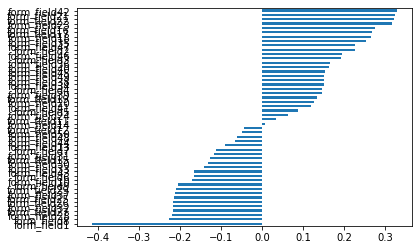

In [ ]:
train_corr = train.corr()['default_status'].copy()
train_corr = train_corr.drop('default_status')
train_corr.sort_values(inplace=True)
train_corr.plot(kind='barh', alpha = 1)
train_corr

### DROP IRRELEVANT COLUMN TO ALGORITHM

In [ ]:
#drop form_field1 in both df_train and df_test set
#df_train = train.drop(['form_field1'], axis =1)
#df_test= test.drop(['form_field1'],axis =1)


In [ ]:
#Dropping form_field1 does not improve my leader board scores even though it exist as the most non-correlative of the columns

### FILLING MISSING VALUES

In [ ]:
#check percentage of null values
train_miss = ((train.isna().sum()*100)/len(train)).sort_values(ascending=False)
test_miss = ((test.isna().sum()*100)/len(test)).sort_values(ascending=False)
missing_ = pd.DataFrame({'train_miss':train_miss, 'test_miss':test_miss})
missing_

,train_miss,test_miss
Applicant_ID,0.000000,0.000000
default_status,0.000000,NaN
form_field1,4.516071,4.625000
form_field10,0.633929,0.612500
form_field11,56.108929,55.825000
form_field12,17.669643,17.429167
form_field13,10.516071,10.262500
form_field14,0.000000,0.000000
form_field15,40.133929,39.966667
form_field16,23.278571,22.808333


In [ ]:
# Drop applicant_ID 
df_train = train.drop(['Applicant_ID'], 1)
df_test= test.drop(['Applicant_ID'],1)

features = df_train.select_dtypes(exclude = object).columns.drop(['default_status'])

for form in features:
    df_test[form].fillna(-999, inplace = True)
    df_train[form].fillna(-999, inplace = True)


#Note that I could have filled my missing value with Median value but it did not perform better


### VISUALIZATION

<function matplotlib.pyplot.show>

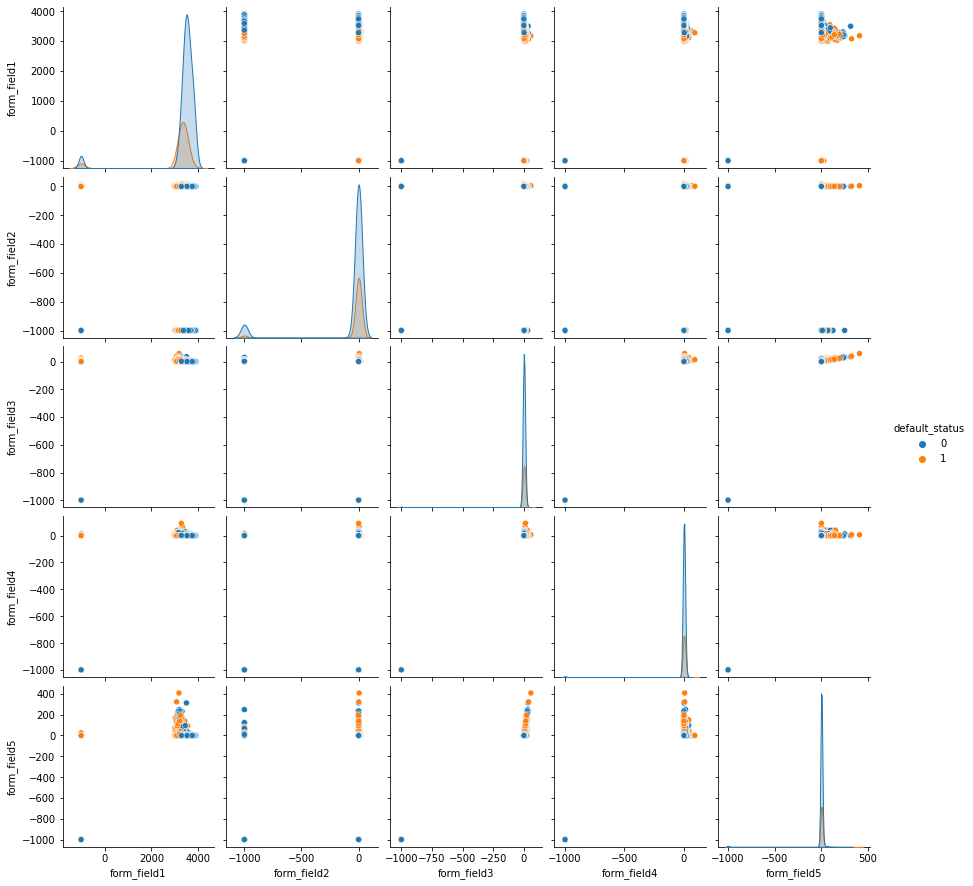

In [ ]:
pair plot of form_field1-5 against
# Visuallizing using PairPlot
sns.pairplot( df_train[['form_field1', 'form_field2','form_field3', 'form_field4','form_field5','default_status']], hue = 'default_status' )
plt.show

In [ ]:
#pair plot of form_field6-10 against
# Visuallizing using PairPlot
sns.pairplot( df_train[['form_field6', 'form_field7','form_field8', 'form_field9','form_field10','default_status']], hue = 'default_status' )
plt.show

<function matplotlib.pyplot.show>

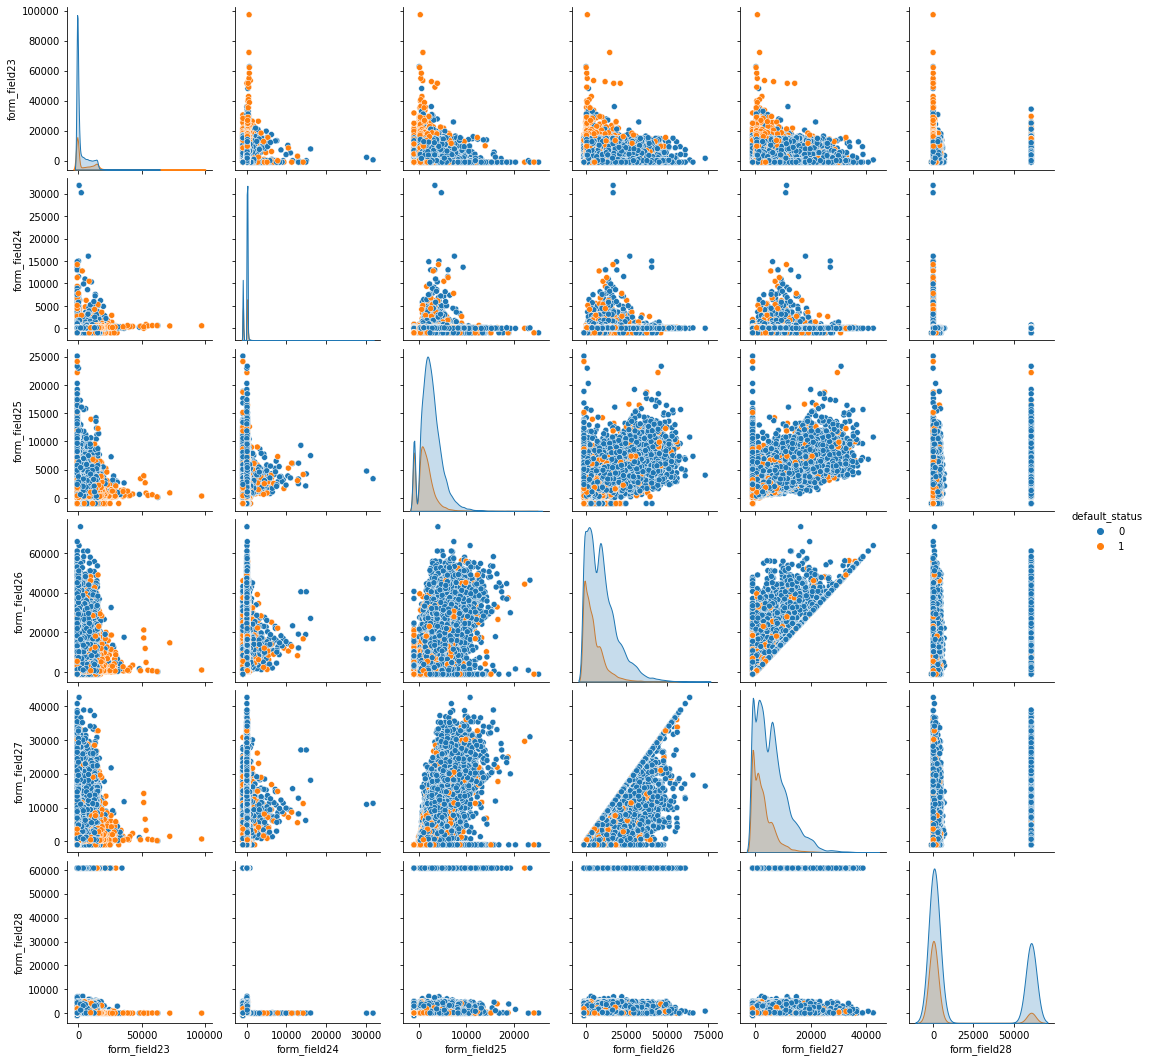

In [ ]:
#pair plot of form_field23-28 against
# Visuallizing using PairPlot
sns.pairplot( df_train[['form_field23', 'form_field24','form_field25', 'form_field26','form_field27','form_field28','default_status']], hue = 'default_status' )
plt.show

<function matplotlib.pyplot.show>

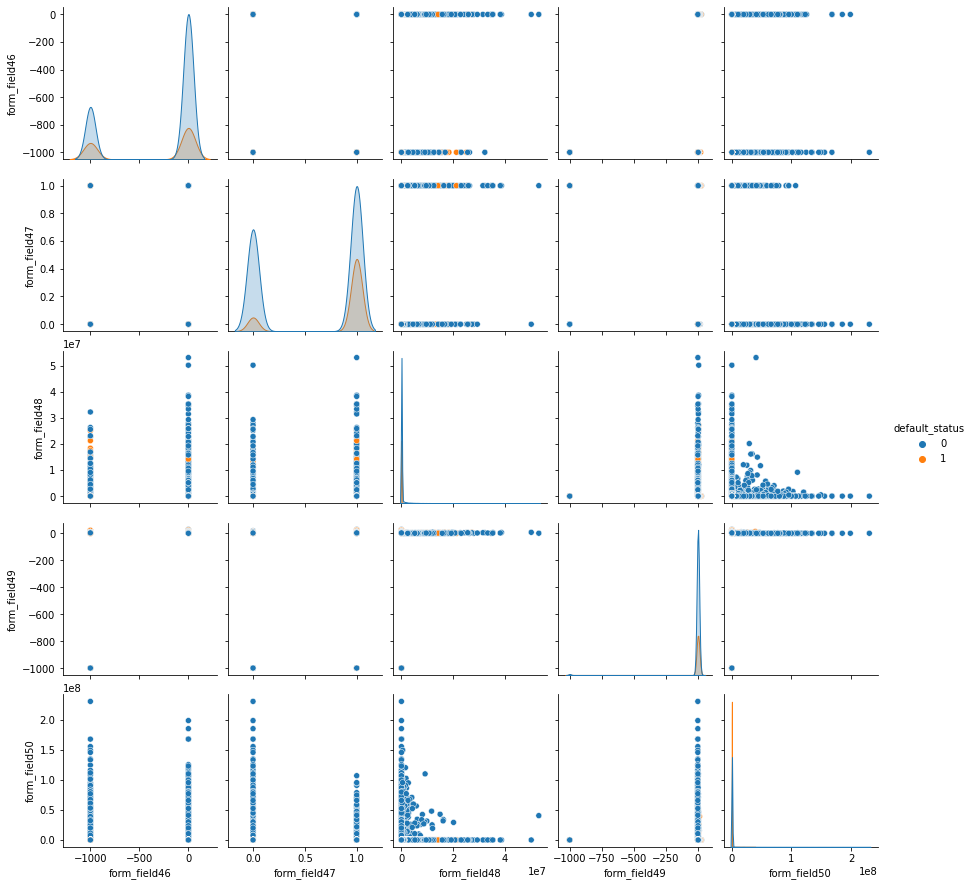

In [ ]:

# Visuallizing using PairPlot
sns.pairplot( df_train[['form_field46', 'form_field47','form_field48', 'form_field49','form_field50','default_status']], hue = 'default_status' )
plt.show

In [ ]:
df_train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,56000.000000,5.600000e+04,56000.000000
mean,3288.988125,-68.061282,-5.287392,-5.486368,-4.389031,4.752342e+05,6.232170e+06,1.999799e+06,1.127799e+07,1.178069e+07,9.012758e+05,2.281290e+06,5.377829e+06,6.914875e+07,6.854873e+07,-232.376143,-198.713089,-185.342911,0.877375,-5.307893,-220.812531,3849.793985,2710.570025,-157.477512,2271.906295,8631.499232,4996.671982,17158.475375,16407.492000,2383.457375,2513.931054,749.800107,-8.791913,-6.104161,-412.826536,-23.188411,-89.569000,2.213946,-75.037214,-747.707893,-647.668167,-23.241859,-3.565496,-95.519653,-558.640946,-283.647714,0.649518,1.910105e+05,-5.290536,4.818161e+05,0.244911
std,950.560828,252.735737,79.400587,79.418227,80.131613,1.278889e+06,1.833216e+07,3.605357e+06,1.888158e+07,2.662648e+07,3.410960e+06,4.257190e+06,2.217339e+07,2.713995e+09,1.054537e+08,422.285716,399.053095,388.625626,8.627427,79.390025,491.120212,5817.699466,5503.049115,604.910786,2153.183593,9016.988065,5603.041057,26884.391711,9735.285958,3858.394906,6336.743816,1146.612131,150.740001,79.309402,492.046373,187.842975,298.746289,80.364466,263.470948,474.850472,515.718136,151.783727,100.964839,294.636580,496.023149,450.532984,0.477125,1.313103e+06,79.391884,5.239461e+06,0.430038
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-9.990000e+02,-999.000000,-9.990000e+02,0.000000
25%,3336.000000,0.047700,0.000000,0.000000,0.000000,0.000000e+00,3.248150e+05,0.000000e+00,4.217732e+05,4.170080e+05,-9.990000e+02,1.205900e+04,0.000000e+00,1.657646e+07,-9.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,889.500000,1734.000000,730.000000,60.000000,9672.000000,-999.000000,-999.000000,112.000000,2.166600,0.000000,-999.000000,6.000000,0.000000,4.000000,0.000000,-999.000000,-999.000000,0.000000,2.020000,0.349148,-999.000000,-999.000000,0.000000,-9.990000e+02,0.000000,7.502524e-03,0.000000
50%,3474.000000,0.226700,0.060000,0.000000,0.000000,4.006700e+04,2.174704e+06,3.765520e+05,3.712227e+06,3.641234e+06,-9.990000e+02,7.037010e+05,1.160776e+06,2.814143e+07,3.854990e+07,0.000000,0.000000,0.000000,0.000000,0.000000,50.775000,596.362500,-999.000000,29.835000,1987.500000,6480.000000,352

## MODELLING

In [ ]:
X = df_train.drop('default_status', axis = 1)
y = df_train['default_status']


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state = 1234)

#Observing the dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((11200, 50), (11200,), (44800, 50), (44800,))

In [ ]:
# picking the best algorithm using a loop

seed = 7
models = []

# Note that LogisticRegression, RFA, gbm, xgb didn't perform better using CPU 

models.append(('Lr', LogisticRegression()))
models.append(('RFA', RandomForestClassifier()))
models.append(('gbm', GradientBoostingClassifier()))
models.append(('Decision_Tree', DecisionTreeClassifier()))
#models.append(('xgb', XGBClassifier(n_estimators = 50)))
models.append(('Catboost', CatBoostClassifier(silent = True)))
models.append(('LGBM', LGBMClassifier(silent = True)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    results.append(score)
    names.append(name)
    msg = "%s: %f " % (name, score)
    print(msg)

Lr: 0.757953 
RFA: 0.822600 
gbm: 0.831237 
Decision_Tree: 0.631697 
Catboost: 0.832432 
LGBM: 0.826459 


In [ ]:
### Dropping default_status
features1 = df_train.select_dtypes(exclude = object).columns.drop(['default_status'])


## CATBOOST PARAMETER TUNNING

#### GridSearch for best parameter tunning


In [ ]:
# Reasons for catboost is to give me a range of number for which I can tune my parameters.
# Note it is better to run one parameter one after the other to save time 

clf = CatBoostClassifier()
params = {'random_seed': [1000,1500,2000],
                             
         }

clf_grid = GridSearchCV(estimator=clf,  param_grid=params, cv=5)


clf_grid.fit(X_train, y_train,
             verbose =500)
best_param = clf_grid.best_params_
best_param

Learning rate set to 0.026277
0:	learn: 0.6785620	total: 16.5ms	remaining: 16.5s
500:	learn: 0.3270517	total: 7.91s	remaining: 7.88s
999:	learn: 0.2545250	total: 15.8s	remaining: 0us
Learning rate set to 0.026277
0:	learn: 0.6787881	total: 15.2ms	remaining: 15.2s
500:	learn: 0.3303848	total: 7.86s	remaining: 7.83s
999:	learn: 0.2574523	total: 15.8s	remaining: 0us
Learning rate set to 0.026277
0:	learn: 0.6785994	total: 15.3ms	remaining: 15.3s
500:	learn: 0.3302400	total: 7.89s	remaining: 7.86s
999:	learn: 0.2562642	total: 15.8s	remaining: 0us
Learning rate set to 0.026277
0:	learn: 0.6786830	total: 15.7ms	remaining: 15.7s
500:	learn: 0.3251949	total: 7.88s	remaining: 7.84s
999:	learn: 0.2509423	total: 15.7s	remaining: 0us
Learning rate set to 0.026277
0:	learn: 0.6776088	total: 14.9ms	remaining: 14.9s
500:	learn: 0.3320520	total: 7.91s	remaining: 7.88s
999:	learn: 0.2611508	total: 15.7s	remaining: 0us
Learning rate set to 0.026277
0:	learn: 0.6761636	total: 15.3ms	remaining: 15.3s
500:

{'random_seed': 1500}

In [ ]:
# Reasons for catboost is to give me a range of number for which I can tune my parameters.
# Note it is better to run one parameter one after the other to save time 

clf = CatBoostClassifier()
params = {'learning_rate': [0.01,0.05],
                             
         }

clf_grid = GridSearchCV(estimator=clf,  param_grid=params, cv=5)

clf_grid.fit(X_train, y_train,
             verbose =500)
best_param = clf_grid.best_params_
best_param

0:	learn: 0.6871111	total: 16.2ms	remaining: 16.2s
500:	learn: 0.3804838	total: 7.79s	remaining: 7.76s
999:	learn: 0.3484899	total: 15.5s	remaining: 0us
0:	learn: 0.6872312	total: 15.5ms	remaining: 15.4s
500:	learn: 0.3827621	total: 7.82s	remaining: 7.79s
999:	learn: 0.3514163	total: 15.5s	remaining: 0us
0:	learn: 0.6871426	total: 16ms	remaining: 16s
500:	learn: 0.3830493	total: 7.74s	remaining: 7.7s
999:	learn: 0.3512502	total: 15.4s	remaining: 0us
0:	learn: 0.6869338	total: 16ms	remaining: 16s
500:	learn: 0.3796673	total: 7.82s	remaining: 7.79s
999:	learn: 0.3480514	total: 16.1s	remaining: 0us
0:	learn: 0.6869585	total: 16.8ms	remaining: 16.8s
500:	learn: 0.3827835	total: 7.83s	remaining: 7.8s
999:	learn: 0.3513149	total: 15.5s	remaining: 0us
0:	learn: 0.6639258	total: 15.2ms	remaining: 15.2s
500:	learn: 0.2601610	total: 7.78s	remaining: 7.75s
999:	learn: 0.1682903	total: 15.5s	remaining: 0us
0:	learn: 0.6645009	total: 16.1ms	remaining: 16.1s
500:	learn: 0.2645708	total: 7.79s	remain

{'learning_rate': 0.01}

In [ ]:
# Repeated same for n_estimators but results wasn't my best for submission.
#

In [ ]:
#I chose something lesser for the learning rate in some instances

### CATBOOST HYPERPARAMETER TUNNING

##### MANUAL TUNNING


##### TEST1: no_skf = 16, seed =1500, learning_rate = 0.009, max_depth = 8

In [ ]:
def metric(y,pred):
    return roc_auc_score(y, pred, labels = [0,1])


from sklearn.model_selection import StratifiedKFold

In [ ]:
error_list = []
test_pred = []

#specify no of folds
no_skf= 16

#specify no of random_seeds
seed = 1500

# parameters to be used with the CatboostClassifer.

params = {'random_seed': seed,
          'n_estimators': 4000,
          'learning_rate': 0.009,
          'max_depth': 8,
          'objective': 'CrossEntropy',
          'eval_metric':'AUC',
          'task_type' : 'GPU',
#         'bagging_temperature': 1,
#         'border_count': 128,
          'early_stopping_rounds': 6000,
          'use_best_model': True,
}

skf = StratifiedKFold(n_splits = no_skf)


score_list = []
score = 0
test_foldscore = []

i=1
for i, (tr_idx, vr_idx) in enumerate(skf.split(X, y)):
    
    xtrain, ytrain = X.loc[tr_idx, features1], y.loc[tr_idx]
    xval, yval = X.loc[vr_idx, features1], y.loc[vr_idx]

    cbm = CatBoostClassifier(**params)
    cbm.fit(xtrain, ytrain, 
              eval_set=[(xval,yval)], 
              verbose =500)
    
    pred_proba = cbm.predict_proba(xval)[:, 1]
    metric_score = metric(yval, pred_proba)    #to get auc score between test and train set
    
    #append auc score to score_list
    score_list.append(metric_score)
    score += metric_score/no_skf #to get the average auc score for the model
    
    pred = cbm.predict_proba(df_test[features1])[:, 1]
    test_foldscore.append(pred)

    print('Fold {} : {}'.format(i, metric_score))

print()
print('Avg log : ', score)


0:	learn: 0.8113513	test: 0.7929256	best: 0.7929256 (0)	total: 27.5ms	remaining: 1m 49s
500:	learn: 0.8546810	test: 0.8258666	best: 0.8258799 (499)	total: 8.94s	remaining: 1m 2s
1000:	learn: 0.8689721	test: 0.8284445	best: 0.8284445 (1000)	total: 17.5s	remaining: 52.4s
1500:	learn: 0.8823457	test: 0.8298731	best: 0.8298926 (1481)	total: 26.1s	remaining: 43.5s
2000:	learn: 0.8947412	test: 0.8306550	best: 0.8306965 (1990)	total: 34.7s	remaining: 34.7s
2500:	learn: 0.9057600	test: 0.8310268	best: 0.8310364 (2499)	total: 43.5s	remaining: 26.1s
3000:	learn: 0.9155795	test: 0.8308343	best: 0.8310850 (2622)	total: 52.3s	remaining: 17.4s
3500:	learn: 0.9241955	test: 0.8305615	best: 0.8310850 (2622)	total: 1m 1s	remaining: 8.72s
3999:	learn: 0.9321813	test: 0.8303619	best: 0.8310850 (2622)	total: 1m 9s	remaining: 0us
bestTest = 0.8310850263
bestIteration = 2622
Shrink model to first 2623 iterations.
Fold 0 : 0.8310850395863052
0:	learn: 0.8113837	test: 0.8123100	best: 0.8123100 (0)	total: 18.1m

In [ ]:
prediction = pd.DataFrame(test_foldscore).T
prediction.columns = ['fold_'+ str(i) for i in range(1, no_skf + 1)]
prediction.head()

,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10,fold_11,fold_12,fold_13,fold_14,fold_15,fold_16
0,0.296760,0.303027,0.346489,0.306710,0.324831,0.318426,0.268321,0.318597,0.332570,0.308004,0.324256,0.323446,0.317945,0.271366,0.319947,0.312426
1,0.383994,0.338882,0.395512,0.349491,0.322326,0.388441,0.364922,0.418542,0.350608,0.431431,0.394094,0.303151,0.379840,0.417506,0.324411,0.319076
2,0.369703,0.395826,0.380339,0.397533,0.425054,0.410727,0.418248,0.384915,0.450397,0.370838,0.397568,0.410588,0.400524,0.356505,0.379049,0.385612
3,0.746461,0.763813,0.761753,0.798225,0.761207,0.739109,0.781674,0.760208,0.774037,0.743430,0.750069,0.770252,0.766701,0.721628,0.758968,0.764131
4,0.149831,0.134701,0.145747,0.178105,0.134222,0.142894,0.145412,0.165310,0.124844,0.155080,0.167660,0.131875,0.146534,0.155100,0.148177,0.140777


In [ ]:
#Submission Re arrangement.
sub_df= {'Applicant_ID': test['Applicant_ID'], 'default_status': pred}
sub = pd.DataFrame(data=sub_df)

sub = sub[['Applicant_ID', 'default_status']]
sub['default_status'] = np.mean(test_foldscore, axis = 0) ##Average of all predictions
sub.to_csv('1uneng16_8_0.009.csv', index = False) 

##### TEST2: no_skf = 10, seed =3000, learning_rate = 0.01, max_depth = 8

In [ ]:
error_list = []
test_pred = []

#specify no of folds
no_skf= 10

#specify no of random_seeds
seed = 3000

# parameters to be used with the CatboostClassifer.

params = {'random_seed': seed,
          'n_estimators': 4000,
          'learning_rate': 0.01,
          'max_depth': 8,
          'objective': 'CrossEntropy',
          'eval_metric':'AUC',
          'task_type' : 'GPU',
#         'bagging_temperature': 1,
#         'border_count': 128,
          'early_stopping_rounds': 6000,
          'use_best_model': True,
}

skf = StratifiedKFold(n_splits = no_skf)


score_list = []
score = 0
test_foldscore = []

i=1
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    xtrain, ytrain = X.loc[train_index, features1], y.loc[train_index]
    xval, yval = X.loc[test_index, features1], y.loc[test_index]

    cbm = CatBoostClassifier(**params)
    cbm.fit(xtrain, ytrain, 
              eval_set=[(xval,yval)], 
              verbose =500)
    
    pred_proba = cbm.predict_proba(xval)[:, 1]
    metric_score = metric(yval, pred_proba)    #to get auc score between test and train set
    
    #append auc score to score_list
    score_list.append(metric_score)
    score += metric_score/no_skf #to get the average auc score for the model
    
    pred = cbm.predict_proba(df_test[features1])[:, 1]
    test_foldscore.append(pred)

    print('Fold {} : {}'.format(i, metric_score))

print()
print('Avg log : ', score)


0:	learn: 0.8117666	test: 0.8007058	best: 0.8007058 (0)	total: 28.6ms	remaining: 1m 54s
500:	learn: 0.8572057	test: 0.8281854	best: 0.8281854 (500)	total: 9.14s	remaining: 1m 3s
1000:	learn: 0.8733044	test: 0.8308115	best: 0.8308320 (996)	total: 18.2s	remaining: 54.5s
1500:	learn: 0.8882892	test: 0.8320104	best: 0.8320352 (1491)	total: 27.3s	remaining: 45.4s
2000:	learn: 0.9014534	test: 0.8324514	best: 0.8324783 (1970)	total: 36.3s	remaining: 36.2s
2500:	learn: 0.9129838	test: 0.8328390	best: 0.8328720 (2304)	total: 45.3s	remaining: 27.1s
3000:	learn: 0.9231265	test: 0.8331418	best: 0.8331647 (2826)	total: 54.2s	remaining: 18s
3500:	learn: 0.9325148	test: 0.8335159	best: 0.8335373 (3497)	total: 1m 3s	remaining: 9.01s
3999:	learn: 0.9407547	test: 0.8335074	best: 0.8336382 (3837)	total: 1m 12s	remaining: 0us
bestTest = 0.8336381912
bestIteration = 3837
Shrink model to first 3838 iterations.
Fold 0 : 0.833638181987834
0:	learn: 0.8097361	test: 0.8113927	best: 0.8113927 (0)	total: 20ms	rem

In [ ]:
prediction = pd.DataFrame(test_foldscore).T
prediction.columns = ['fold_'+ str(i) for i in range(1, no_skf + 1)]
prediction.head()

,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10
0,0.321702,0.356946,0.330783,0.297136,0.312691,0.326629,0.305808,0.304893,0.299325,0.326025
1,0.378787,0.357476,0.350762,0.350269,0.495419,0.382943,0.359960,0.378066,0.438259,0.348354
2,0.369436,0.388202,0.383217,0.411731,0.408982,0.400369,0.422960,0.401197,0.356798,0.390621
3,0.739044,0.735810,0.753158,0.774270,0.747519,0.749576,0.774053,0.750254,0.752413,0.768047
4,0.122596,0.160282,0.155455,0.137291,0.157577,0.152748,0.147372,0.152403,0.168091,0.105502


In [ ]:
#Submission Re arrangement.
sub_df= {'Applicant_ID': test['Applicant_ID'], 'default_status': pred}
sub = pd.DataFrame(data=sub_df)

sub = sub[['Applicant_ID', 'default_status']]
sub['default_status'] = np.mean(test_foldscore, axis = 0) ##Average of all predictions
sub.to_csv('unengineerd10_8_0.01_.csv', index = False) 

##### TEST3: no_skf = 10, seed =3000, learning_rate = 0.01, max_depth = 8

In [ ]:
error_list = []
test_pred = []

#specify no of folds
no_skf= 16

#specify no of random_seeds
seed = 3000

# parameters to be used with the CatboostClassifer.

params = {'n_estimators': 4000,
          'random_seed': seed,
          'learning_rate': 0.009,
          'max_depth': 8,
          'objective': 'CrossEntropy',
          'eval_metric':'AUC',
          'task_type' : 'GPU',
#         'bagging_temperature': 1,
#         'border_count': 128,
          'early_stopping_rounds': 3000,
          'use_best_model': True,
}

skf = StratifiedKFold(n_splits = no_skf)


score_list = []
score = 0
test_foldscore = []

i=1
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    xtrain, ytrain = X.loc[train_index, features1], y.loc[train_index]
    xval, yval = X.loc[test_index, features1], y.loc[test_index]

    cbm = CatBoostClassifier(**params)
    cbm.fit(xtrain, ytrain, 
              eval_set=[(xval,yval)], 
              verbose =500)
    
    pred_proba = cbm.predict_proba(xval)[:, 1]
    metric_score = metric(yval, pred_proba)    #to get auc score between test and train set
    
    #append auc score to score_list
    score_list.append(metric_score)
    score += metric_score/no_skf #to get the average auc score for the model
    
    pred = cbm.predict_proba(df_test[features1])[:, 1]
    test_foldscore.append(pred)

    print('Fold {} : {}'.format(i, metric_score))

print()
print('Avg log : ', score)


0:	learn: 0.8118722	test: 0.7959657	best: 0.7959657 (0)	total: 17.9ms	remaining: 1m 11s
500:	learn: 0.8548411	test: 0.8253691	best: 0.8253691 (500)	total: 8.76s	remaining: 1m 1s
1000:	learn: 0.8691306	test: 0.8280763	best: 0.8281134 (999)	total: 17.4s	remaining: 52s
1500:	learn: 0.8824303	test: 0.8291367	best: 0.8291844 (1454)	total: 26.1s	remaining: 43.5s
2000:	learn: 0.8949904	test: 0.8298299	best: 0.8299310 (1965)	total: 35s	remaining: 34.9s
2500:	learn: 0.9056421	test: 0.8304983	best: 0.8305606 (2481)	total: 43.7s	remaining: 26.2s
3000:	learn: 0.9152563	test: 0.8306065	best: 0.8306294 (2980)	total: 52.4s	remaining: 17.4s
3500:	learn: 0.9239358	test: 0.8305331	best: 0.8307526 (3068)	total: 1m 1s	remaining: 8.7s
3999:	learn: 0.9319330	test: 0.8305628	best: 0.8307526 (3068)	total: 1m 9s	remaining: 0us
bestTest = 0.8307526112
bestIteration = 3068
Shrink model to first 3069 iterations.
Fold 0 : 0.8307525967406474
0:	learn: 0.8113616	test: 0.8057095	best: 0.8057095 (0)	total: 19.1ms	rema

In [ ]:
prediction = pd.DataFrame(test_foldscore).T
prediction.columns = ['fold_'+ str(i) for i in range(1, no_skf + 1)]
prediction.head()

,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10,fold_11,fold_12,fold_13,fold_14,fold_15,fold_16
0,0.314289,0.313141,0.341521,0.310254,0.309591,0.299862,0.246445,0.320988,0.322947,0.292430,0.301874,0.305997,0.315959,0.298148,0.323233,0.288001
1,0.340896,0.317850,0.355983,0.337336,0.372390,0.345746,0.369840,0.428326,0.386549,0.369487,0.401472,0.296730,0.381390,0.415914,0.367892,0.345517
2,0.367469,0.392170,0.380931,0.392184,0.413573,0.442125,0.418769,0.391897,0.391535,0.399427,0.411933,0.428192,0.384681,0.353399,0.390168,0.388608
3,0.766637,0.752481,0.748084,0.746945,0.740468,0.764629,0.745480,0.760533,0.748968,0.757795,0.785451,0.759695,0.741915,0.740345,0.770738,0.767581
4,0.145263,0.117188,0.145589,0.140752,0.139413,0.137867,0.148346,0.165574,0.156785,0.149229,0.163192,0.130567,0.152607,0.165235,0.150989,0.142866


In [ ]:
#Submission Re arrangement.
sub_df= {'Applicant_ID': test['Applicant_ID'], 'default_status': pred}
sub = pd.DataFrame(data=sub_df)

sub = sub[['Applicant_ID', 'default_status']]
sub['default_status'] = np.mean(test_foldscore, axis = 0) ##Average of all predictions
sub.to_csv('unengineerd15_9_0.009_.csv', index = False) 

##### TEST4: no_skf = 16, seed =3000,n_estimators =4000, learning_rate = 0.008, max_depth = 9

In [ ]:
error_list = []
test_pred = []

#specify no of folds
no_skf= 16

#specify no of random_seeds
seed = 3000

# parameters to be used with the CatboostClassifer.

params = {'n_estimators': 4000,
          'learning_rate': 0.009,
          'max_depth': 9,
          'objective': 'CrossEntropy',
          'eval_metric':'AUC',
          'task_type' : 'GPU',
#         'bagging_temperature': 1,
#         'border_count': 128,
          'random_seed': seed,
          'early_stopping_rounds': 3000,
          'use_best_model': True,
}

skf = StratifiedKFold(n_splits = no_skf)


score_list = []
score = 0
test_foldscore = []

i=1
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    xtrain, ytrain = X.loc[train_index, features1], y.loc[train_index]
    xval, yval = X.loc[test_index, features1], y.loc[test_index]

    cbm = CatBoostClassifier(**params)
    cbm.fit(xtrain, ytrain, 
              eval_set=[(xval,yval)], 
              verbose =500)
    
    pred_proba = cbm.predict_proba(xval)[:, 1]
    metric_score = metric(yval, pred_proba)    #to get auc score between test and train set
    
    #append auc score to score_list
    score_list.append(metric_score)
    score += metric_score/no_skf #to get the average auc score for the model
    
    pred = cbm.predict_proba(df_test[features1])[:, 1]
    test_foldscore.append(pred)
    
    print('Fold {} : {}'.format(i, metric_score))

print()
print('Avg log : ', score)


0:	learn: 0.8163329	test: 0.7952307	best: 0.7952307 (0)	total: 22.4ms	remaining: 1m 29s
500:	learn: 0.8649602	test: 0.8257854	best: 0.8257854 (500)	total: 11s	remaining: 1m 16s
1000:	learn: 0.8852755	test: 0.8280644	best: 0.8280886 (999)	total: 22s	remaining: 1m 5s
1500:	learn: 0.9035065	test: 0.8287303	best: 0.8287341 (1488)	total: 33s	remaining: 54.9s
2000:	learn: 0.9202691	test: 0.8290087	best: 0.8290921 (1942)	total: 44.1s	remaining: 44.1s
2500:	learn: 0.9337944	test: 0.8289496	best: 0.8291427 (2122)	total: 55.2s	remaining: 33.1s
3000:	learn: 0.9452202	test: 0.8288140	best: 0.8291427 (2122)	total: 1m 6s	remaining: 22.1s
3500:	learn: 0.9547232	test: 0.8286697	best: 0.8291427 (2122)	total: 1m 17s	remaining: 11s
3999:	learn: 0.9626215	test: 0.8284643	best: 0.8291427 (2122)	total: 1m 28s	remaining: 0us
bestTest = 0.8291426897
bestIteration = 2122
Shrink model to first 2123 iterations.
Fold 0 : 0.8291424784695797
0:	learn: 0.8157386	test: 0.8070123	best: 0.8070123 (0)	total: 22.7ms	rema

In [ ]:
prediction = pd.DataFrame(test_foldscore).T
prediction.columns = ['fold_'+ str(i) for i in range(1, no_skf + 1)]
prediction.head()


,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10,fold_11,fold_12,fold_13,fold_14,fold_15,fold_16
0,0.294392,0.296829,0.324328,0.324467,0.302200,0.322248,0.275766,0.346630,0.324664,0.301490,0.304510,0.285303,0.297877,0.291067,0.294388,0.344409
1,0.390251,0.329836,0.407683,0.382930,0.349633,0.392880,0.343165,0.419400,0.423540,0.426435,0.392434,0.315910,0.380142,0.431863,0.313350,0.366256
2,0.348116,0.396214,0.389162,0.378257,0.412419,0.389201,0.418948,0.370097,0.394374,0.374767,0.394505,0.406449,0.383652,0.347327,0.377110,0.364375
3,0.744518,0.747141,0.743553,0.775096,0.762979,0.730378,0.793196,0.743623,0.720594,0.748439,0.771989,0.733953,0.765217,0.715991,0.778278,0.751765
4,0.151643,0.112163,0.126913,0.168731,0.097580,0.150116,0.132537,0.148268,0.150351,0.154770,0.149453,0.125401,0.138779,0.161866,0.121134,0.148866


In [ ]:
#Submission Re arrangement.
sub_df= {'Applicant_ID': test['Applicant_ID'], 'default_status': pred}
sub = pd.DataFrame(data=sub_df)

sub = sub[['Applicant_ID', 'default_status']]
sub['default_status'] = np.mean(test_foldscore, axis = 0) ##Average of all predictions
sub.to_csv('unengineerd16_9_0.008_.csv', index = False) 

### LGBM PARAMETER TUNNING

##### MANUAL TUNNING

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

def metric(y,pred):
    return roc_auc_score(y, pred, labels = [0,1])

#### TEST1: 

##### TEST1: no_skf = 10, seed =2500,n_estimators =4000, learning_rate = 0.01, max_depth = 8

In [ ]:
error_list = []
test_pred = []

#specify no of folds
no_skf= 10

#specify no of random_seeds
seed = 2500

# parameters to be used with the LGBMClassifer.

params = {'n_estimators': 4000,
          'learning_rate': 0.01,
          'max_depth': 8,
          'num_iterations': 5000,
          'eval_metric':'AUC',
#         'task_type' : 'GPU',
#         'bagging_temperature': 1,
#         'border_count': 128,
          'random_seed': seed,
          'early_stopping_rounds': 2000,
          'use_best_model': True,
}

skf = StratifiedKFold(n_splits = no_skf)


score_list = []
score = 0
test_foldscore = []

i=1
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    xtrain, ytrain = X.loc[train_index, features1], y.loc[train_index]
    xval, yval = X.loc[test_index, features1], y.loc[test_index]

    lgbm = LGBMClassifier(**params)
    lgbm.fit(xtrain, ytrain, 
              eval_set=[(xval,yval)], 
              verbose =500)
    
    pred_proba = lgbm.predict_proba(xval)[:, 1]
    metric_score = metric(yval, pred_proba)    #to get auc score between test and train set
    
    #append auc score to score_list
    score_list.append(metric_score)
    score += metric_score/no_skf #to get the average auc score for the model
    
    pred = lgbm.predict_proba(df_test[features1])[:, 1]
    test_foldscore.append(pred)

    print('Fold {} : {}'.format(i, metric_score))

print()
print('Avg log : ', score)


Training until validation scores don't improve for 2000 rounds.
[500]	valid_0's binary_logloss: 0.416727
[1000]	valid_0's binary_logloss: 0.415045
[1500]	valid_0's binary_logloss: 0.414723
[2000]	valid_0's binary_logloss: 0.414784
[2500]	valid_0's binary_logloss: 0.414924
[3000]	valid_0's binary_logloss: 0.415366
[3500]	valid_0's binary_logloss: 0.415869
Early stopping, best iteration is:
[1833]	valid_0's binary_logloss: 0.414678
Fold 0 : 0.8301783437930486
Training until validation scores don't improve for 2000 rounds.
[500]	valid_0's binary_logloss: 0.402224
[1000]	valid_0's binary_logloss: 0.399983
[1500]	valid_0's binary_logloss: 0.400261
[2000]	valid_0's binary_logloss: 0.400451
[2500]	valid_0's binary_logloss: 0.400569
[3000]	valid_0's binary_logloss: 0.400947
Early stopping, best iteration is:
[1015]	valid_0's binary_logloss: 0.399952
Fold 1 : 0.8449914875217296
Training until validation scores don't improve for 2000 rounds.
[500]	valid_0's binary_logloss: 0.409484
[1000]	valid_

In [ ]:
prediction = pd.DataFrame(test_foldscore).T
prediction.columns = ['fold_'+ str(i) for i in range(1, no_skf + 1)]
prediction.head()


,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10
0,0.317287,0.287257,0.351547,0.267591,0.301463,0.330388,0.304301,0.242257,0.273855,0.324450
1,0.381230,0.378096,0.364396,0.312387,0.466344,0.303299,0.376304,0.306199,0.353755,0.250094
2,0.323486,0.336546,0.450255,0.407241,0.387629,0.396910,0.367163,0.383429,0.361077,0.377784
3,0.729108,0.692954,0.753239,0.724866,0.706510,0.727999,0.699465,0.747593,0.677234,0.712716
4,0.160296,0.160755,0.124018,0.169447,0.183930,0.090517,0.149663,0.089249,0.223269,0.118267


In [ ]:
#Submission Re arrangement.
sub_df= {'Applicant_ID': test['Applicant_ID'], 'default_status': pred}
sub = pd.DataFrame(data=sub_df)

sub = sub[['Applicant_ID', 'default_status']]
sub['default_status'] = np.mean(test_foldscore, axis = 0) ##Average of all predictions
sub.to_csv('0.8389lgbmuneng10_8_0.01_.csv', index = False) 

##### TEST2: no_skf = 16, seed =2500,n_estimators =4000, learning_rate = 0.007, max_depth = 10, num_iterations =5000

In [ ]:
error_list = []
test_pred = []

#specify no of folds
no_skf= 16

#specify no of random_seeds
seed = 2500

# parameters to be used with the LGBMClassifer.

params = {'n_estimators': 4000,
          'learning_rate': 0.007,
          'max_depth': 10,
          'num_iterations': 5000,
          'eval_metric':'AUC',
#         'task_type' : 'GPU',
#         'bagging_temperature': 1,
#         'border_count': 128,
          'random_seed': seed,
          'early_stopping_rounds': 2000,
          'use_best_model': True,
}

skf = StratifiedKFold(n_splits = no_skf)


score_list = []
score = 0
test_foldscore = []

i=1
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    xtrain, ytrain = X.loc[train_index, features1], y.loc[train_index]
    xval, yval = X.loc[test_index, features1], y.loc[test_index]
    
    lgbm = LGBMClassifier(**params)
    lgbm.fit(xtrain, ytrain, 
              eval_set=[(xval,yval)], 
              verbose =500)
    
    pred_proba = lgbm.predict_proba(xval)[:, 1]
    metric_score = metric(yval, pred_proba)    #to get auc score between test and train set
    
    #append auc score to score_list
    score_list.append(metric_score)
    score += metric_score/no_skf #to get the average auc score for the model
    
    pred = lgbm.predict_proba(df_test[features1])[:, 1]
    test_foldscore.append(pred)

    print('Fold {} : {}'.format(i, metric_score))

print()
print('Avg log : ', score)


Training until validation scores don't improve for 2000 rounds.
[500]	valid_0's binary_logloss: 0.421867
[1000]	valid_0's binary_logloss: 0.418467
[1500]	valid_0's binary_logloss: 0.417448
[2000]	valid_0's binary_logloss: 0.417686
[2500]	valid_0's binary_logloss: 0.417922
[3000]	valid_0's binary_logloss: 0.418516
[3500]	valid_0's binary_logloss: 0.419239
Early stopping, best iteration is:
[1655]	valid_0's binary_logloss: 0.417413
Fold 0 : 0.8281963629075019
Training until validation scores don't improve for 2000 rounds.
[500]	valid_0's binary_logloss: 0.408513
[1000]	valid_0's binary_logloss: 0.40186
[1500]	valid_0's binary_logloss: 0.400429
[2000]	valid_0's binary_logloss: 0.400043
[2500]	valid_0's binary_logloss: 0.400028
[3000]	valid_0's binary_logloss: 0.399967
[3500]	valid_0's binary_logloss: 0.400103
[4000]	valid_0's binary_logloss: 0.400197
[4500]	valid_0's binary_logloss: 0.400753
Early stopping, best iteration is:
[2693]	valid_0's binary_logloss: 0.399831
Fold 1 : 0.8441138852

In [ ]:
prediction = pd.DataFrame(test_foldscore).T
prediction.columns = ['fold_'+ str(i) for i in range(1, no_skf + 1)]
prediction.head()


,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10,fold_11,fold_12,fold_13,fold_14,fold_15,fold_16
0,0.283185,0.269171,0.312323,0.295709,0.309407,0.291848,0.292342,0.306754,0.312500,0.329752,0.323366,0.283945,0.275830,0.281910,0.332300,0.317291
1,0.328997,0.354050,0.438158,0.384087,0.307071,0.208173,0.387764,0.326803,0.289162,0.397500,0.407305,0.323514,0.356322,0.399509,0.246435,0.310182
2,0.365333,0.341948,0.338171,0.410404,0.401293,0.410953,0.373720,0.379259,0.392446,0.371667,0.380195,0.380415,0.378583,0.350682,0.375578,0.387020
3,0.696387,0.687635,0.699667,0.731309,0.747719,0.740875,0.677451,0.706267,0.746619,0.718704,0.712406,0.722121,0.731215,0.656206,0.739696,0.746108
4,0.151571,0.129639,0.173044,0.127907,0.138945,0.166742,0.202083,0.179163,0.121312,0.115386,0.177133,0.144666,0.161368,0.223495,0.124927,0.111833


In [ ]:
#Submission Re arrangement.
sub_df= {'Applicant_ID': test['Applicant_ID'], 'default_status': pred}
sub = pd.DataFrame(data=sub_df)

sub = sub[['Applicant_ID', 'default_status']]
sub['default_status'] = np.mean(test_foldscore, axis = 0) ##Average of all predictions
sub.to_csv('0.83895lgbmuneng16_10_0.007_.csv', index = False) 

##### TEST3: no_skf = 10, seed =2500,n_estimators =4000, learning_rate = 0.008, max_depth = 9, num_iterations =5000

In [ ]:
error_list = []
test_pred = []

#specify no of folds
no_skf= 10

#specify no of random_seeds
seed = 2500

# parameters to be used with the LGBMClassifer.

params = {'n_estimators': 4000,
          'learning_rate': 0.008,
          'max_depth': 9,
          'num_iterations': 5000,
          'eval_metric':'AUC',
#         'task_type' : 'GPU',
#         'bagging_temperature': 1,
#         'border_count': 128,
          'random_seed': seed,
          'early_stopping_rounds': 2000,
          'use_best_model': True,
}

skf = StratifiedKFold(n_splits = no_skf)


score_list = []
score = 0
test_foldscore = []

i=1
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    xtrain, ytrain = X.loc[train_index, features1], y.loc[train_index]
    xval, yval = X.loc[test_index, features1], y.loc[test_index]

    lgbm = LGBMClassifier(**params)
    lgbm.fit(xtrain, ytrain, 
              eval_set=[(xval,yval)], 
              verbose =500)
    
    pred_proba = lgbm.predict_proba(xval)[:, 1]
    metric_score = metric(yval, pred_proba)    #to get auc score between test and train set
    
    #append auc score to score_list
    score_list.append(metric_score)
    score += metric_score/no_skf #to get the average auc score for the model
    
    pred = lgbm.predict_proba(df_test[features1])[:, 1]
    test_foldscore.append(pred)

    print('Fold {} : {}'.format(i, metric_score))

print()
print('Avg log : ', score)


Training until validation scores don't improve for 2000 rounds.
[500]	valid_0's binary_logloss: 0.418588
[1000]	valid_0's binary_logloss: 0.415427
[1500]	valid_0's binary_logloss: 0.41532
[2000]	valid_0's binary_logloss: 0.415413
[2500]	valid_0's binary_logloss: 0.415432
[3000]	valid_0's binary_logloss: 0.416038
Early stopping, best iteration is:
[1277]	valid_0's binary_logloss: 0.415171
Fold 0 : 0.8293565028659223
Training until validation scores don't improve for 2000 rounds.
[500]	valid_0's binary_logloss: 0.404747
[1000]	valid_0's binary_logloss: 0.400804
[1500]	valid_0's binary_logloss: 0.400763
[2000]	valid_0's binary_logloss: 0.400704
[2500]	valid_0's binary_logloss: 0.40053
[3000]	valid_0's binary_logloss: 0.40065
[3500]	valid_0's binary_logloss: 0.400959
[4000]	valid_0's binary_logloss: 0.401371
[4500]	valid_0's binary_logloss: 0.401826
Early stopping, best iteration is:
[2552]	valid_0's binary_logloss: 0.40052
Fold 1 : 0.8445358099289768
Training until validation scores don't

In [ ]:
prediction = pd.DataFrame(test_foldscore).T
prediction.columns = ['fold_'+ str(i) for i in range(1, no_skf + 1)]
prediction.head()

,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10
0,0.300820,0.283241,0.346536,0.275486,0.291939,0.307293,0.298253,0.267439,0.293473,0.289230
1,0.419837,0.377186,0.329318,0.308197,0.448284,0.340303,0.403280,0.302396,0.347447,0.260092
2,0.334328,0.351307,0.434692,0.398824,0.391211,0.373532,0.374451,0.363653,0.356276,0.381508
3,0.708108,0.703274,0.750298,0.733056,0.718925,0.723383,0.696698,0.744682,0.673262,0.696973
4,0.173059,0.135886,0.134735,0.166035,0.188581,0.110256,0.144465,0.100708,0.219152,0.109149


In [ ]:
#Submission Re arrangement.
sub_df= {'Applicant_ID': test['Applicant_ID'], 'default_status': pred}
sub = pd.DataFrame(data=sub_df)

sub = sub[['Applicant_ID', 'default_status']]
sub['default_status'] = np.mean(test_foldscore, axis = 0) ##Average of all predictions
sub.to_csv('0.83891lgbmuneng10_9_0.008_.csv', index = False) 

### BLENDING


In [ ]:
submission = pd.read_csv('SampleSubmission.csv')

In [ ]:
path = 'results/'  # note this is the location where i saved all submissions

pred1 = pd.read_csv(path + '1uneng16_8_0.009.csv')['default_status'] #best score on the leaderboard
pred2 = pd.read_csv(path + 'unengineerd15_9_0.009_.csv')['default_status']
pred3 = pd.read_csv(path + 'unengineerd16_9_0.008_.csv')['default_status']
pred4 = pd.read_csv(path + 'unengineerd10_8_0.01_.csv')['default_status']
pred5 = pd.read_csv(path + '0.8395lgbmuneng16_10_0.007.csv')['default_status']
pred6 = pd.read_csv(path + '0.8389lgbmuneng10_8_0.01.csv')['default_status']


In [ ]:
#Checking the most highly correlative with my best score
#My best score on the LB is 1uneng16_8_0.009

print('1corr2:',pred1.corr(pred2))
print('1corr3:',pred1.corr(pred3))
print('1corr4:',pred1.corr(pred4))
print('1corr5:',pred1.corr(pred5))
print('1corr6:',pred1.corr(pred6))


Note: This won't show output because I downloaded the submissions on my pc...

Below is the result of the output of the print command

    1corr2: 0.9994109974010015
    1corr3: 0.99948223594292
    1corr4: 0.9993965843687775
    1corr5: 0.9907246787978535
    1corr6: 0.9907459421912903


In [ ]:
pred = (pred1*0.60 + 0.25 *pred3 + 0.1*pred6 + 0.05*pred5)
sub['default_status'] = pred
sub.to_csv('results/blend_lgbm_cbm_6.csv', index = False)

In [ ]:
pred = (pred1*0.60 + 0.25 *pred3 + 0.1*pred6)
sub['default_status'] = pred
sub.to_csv('results/blend_lgbm_cbm_6_new.csv', index = False)

In [ ]:
pred = (pred1*0.50 +  0.3*pred3 + 0.15*pred6 + 0.05*pred5)
sub['default_status'] = pred
sub.to_csv('results/blend_lgbm_cbm_7.csv', index = False)

In [ ]:
pred = (pred1*0.45 +  0.25*pred3 + 0.15*pred6 + 0.15*pred5)
sub['default_status'] = pred
sub.to_csv('results/blend_lgbm_cbm_9.csv', index = False)

In [ ]:
pred = (pred1*0.65 +  0.20*pred3 + 0.15*pred6 + 0.05*pred5)
sub['default_status'] = pred
sub.to_csv('results/blend_lgbm_cbm_10.csv', index = False)

### Note: my best leaderboard score was based on the blending - results/blend_lgbm_cbm_6

In [ ]:
error_list = []
test_pred = []

#specify no of folds
no_skf= 1

#specify no of random_seeds
seed = 3000

# parameters to be used with the CatboostClassifer.

params = {'n_estimators': 4000,
          'learning_rate': 0.01,
          'max_depth': 8,
          'objective': 'CrossEntropy',
          'eval_metric':'AUC',
          'task_type' : 'GPU',
#         'bagging_temperature': 1,
#         'border_count': 128,
          'random_seed': seed,
          'early_stopping_rounds': 6000,
          'use_best_model': True,
}

skf = StratifiedKFold(n_splits = no_skf)


score_list = []
score = 0
test_foldscore = []

i=1
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    xtrain, ytrain = X.loc[train_index, features1], y.loc[train_index]
    xval, yval = X.loc[test_index, features1], y.loc[test_index]

    cbm = CatBoostClassifier(**params)
    cbm.fit(xtrain, ytrain, 
              eval_set=[(xval,yval)], 
              verbose =500)
    
    pred_proba = cbm.predict_proba(xval)[:, 1]
    metric_score = metric(yval, pred_proba)    #to get auc score between test and train set
    
    #append auc score to score_list
    score_list.append(metric_score)
    score += metric_score/no_skf #to get the average auc score for the model
    
    pred = cbm.predict_proba(df_test[features1])[:, 1]
    test_foldscore.append(pred)

    print('Fold {} : {}'.format(i, metric_score))

print()
print('Avg log : ', score)


ValueError: ignored